# Code

In [ ]:
from collections import deque, defaultdict

In [ ]:
class DinicsAlgorithm:
    def __init__(self):
        self.graph = defaultdict(list)      # graph: adjacency list storing vertices and edges
        self.capacity = defaultdict(lambda: defaultdict(int))   # capacity: residual capacities between vertices
        self.vertex_to_index = {}           # vertex_to_index: maps vertex names to indices
        self.index_to_vertex = []           # index_to_vertex: maps indices back to vertex names

    def add_vertex(self, vertex):
        if vertex not in self.vertex_to_index:      # add vertex if not already in graph
            index = len(self.index_to_vertex)       # assign new index
            self.vertex_to_index[vertex] = index
            self.index_to_vertex.append(vertex)

    def add_arc(self, from_vertex, to_vertex, value):
        # ensure both vertices exist
        self.add_vertex(from_vertex)
        self.add_vertex(to_vertex)

        # map vertices to indices
        u = self.vertex_to_index[from_vertex]
        v = self.vertex_to_index[to_vertex]

        # add arc with capacity and reverse arc with 0 capacity
        self.graph[u].append(v)
        self.graph[v].append(u)
        self.capacity[u][v] += value
        self.capacity[v][u] += 0

    def bfs(self, source, sink, level):
        # BFS to construct level graph
        queue = deque([source])
        level[source] = 0  # mark source level

        while queue:
            vertex = queue.popleft()

            for neighbor in self.graph[vertex]:

                # check residual capacity > 0 and unvisited
                if level[neighbor] < 0 and self.capacity[vertex][neighbor] > 0:
                    level[neighbor] = level[vertex] + 1
                    queue.append(neighbor)

        return level[sink] >= 0  # return True if sink is reachable

    def dfs(self, vertex, sink, flow, level, start):
        # DFS to push flow along augmenting paths

        if vertex == sink:
            return flow

        while start[vertex] < len(self.graph[vertex]):
            neighbor = self.graph[vertex][start[vertex]]

            # check if neighbor is in level graph and has capacity
            if level[neighbor] == level[vertex] + 1 and self.capacity[vertex][neighbor] > 0:
                min_flow = min(flow, self.capacity[vertex][neighbor])
                pushed = self.dfs(neighbor, sink, min_flow, level, start)

                if pushed > 0:
                    self.capacity[vertex][neighbor] -= pushed
                    self.capacity[neighbor][vertex] += pushed
                    return pushed
            start[vertex] += 1
        return 0

    def max_flow(self, source, sink):
        # calculate max flow using Dinic's algorithm
        source_index = self.vertex_to_index[source]
        sink_index = self.vertex_to_index[sink]
        total_flow = 0

        while True:

            # step 1: construct level graph
            level = [-1] * len(self.index_to_vertex)
            if not self.bfs(source_index, sink_index, level):
                break

            # step 2: send flow using DFS
            start = [0] * len(self.index_to_vertex)
            while True:
                flow = self.dfs(source_index, sink_index, float('Inf'), level, start)
                if flow == 0:
                    break
                total_flow += flow
        return total_flow

# Example

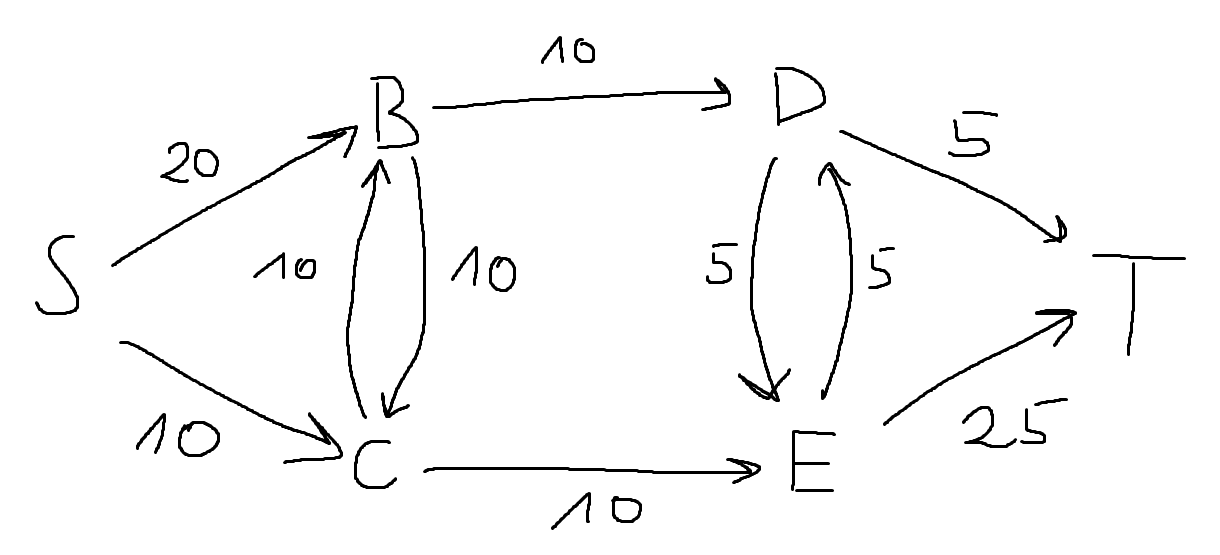

In [ ]:
dinics = DinicsAlgorithm()

dinics.add_arc('s', 'b', 20)
dinics.add_arc('s', 'c', 10)
dinics.add_arc('b', 'c', 10)
dinics.add_arc('c', 'b', 10)
dinics.add_arc('b', 'd', 10)
dinics.add_arc('c', 'e', 10)
dinics.add_arc('d', 'e', 5)
dinics.add_arc('e', 'd', 5)
dinics.add_arc('d', 't', 5)
dinics.add_arc('e', 't', 25)

source, sink = 's', 't'
print("Maximum Flow:", dinics.max_flow(source, sink))

Maximum Flow: 20
